In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rcParams["font.family"] = "Nanum Gothic"

In [2]:
df = pd.read_csv("../data/raw/재실시간_KTAS_상관관계.csv", index_col=[0, 1])
df

total   0-2   2-4   4-6   6-8  8-12  12-24   24-
대구 total   100.0  26.7  26.6  13.7   7.9   7.6   11.3   6.2
   KTAS12   11.2   6.1   7.9  12.9  13.8  15.4   18.5  21.4
   KTAS3    60.5  40.9  59.8  68.3  73.5  74.0   74.1  73.2
   KTAS45   28.3  52.9  32.4  18.7  12.7  10.6    7.4   5.4
경북 total   100.0  59.2  26.5   8.0   2.8   1.7    1.3   0.6
   KTAS12    5.3   3.8   6.2   7.9  10.1  12.0   15.2  19.8
   KTAS3    43.0  31.0  57.0  66.6  67.3  68.2   67.0  66.9
   KTAS45   51.5  65.0  36.8  25.5  22.6  19.8   17.2  13.3

In [3]:
ls = list()
for sido in ["대구", "경북"]:
    for ktas in ["12", "3", "45"]:
        val = (df.loc[(sido, "total")] * df.loc[(sido, "KTAS" + ktas)] / 100).tolist()
        ls.append([sido, f"ktas{ktas}"] + [v / val[0] * 100 for v in val[1:]])
new_df = pd.DataFrame(data=ls, columns=["시도", "ktas"] + df.columns[1:].tolist())
new_df.to_csv("../data/processed/occupancy_duration_ktas_corr.csv", index=False)
new_df

,시도,ktas,0-2,2-4,4-6,6-8,8-12,12-24,24-
0,대구,ktas12,14.541964,18.762500,15.779464,9.733929,10.450000,18.665179,11.846429
1,대구,ktas3,18.050083,26.292231,15.466281,9.597521,9.295868,13.840165,7.501488
2,대구,ktas45,49.909187,30.453710,9.052650,3.545230,2.846643,2.954770,1.183039
3,경북,ktas12,42.445283,31.000000,11.924528,5.335849,3.849057,3.728302,2.241509
4,경북,ktas3,42.679070,35.127907,12.390698,4.382326,2.696279,2.025581,0.933488
5,경북,ktas45,74.718447,18.935922,3.961165,1.228738,0.653592,0.434175,0.154951


In [4]:
ls = list()
for sido in ["대구", "경북"]:
    for ktas in ["12", "3", "45"]:
        val = df.loc[(sido, f"KTAS{ktas}"), "total"]
        ls.append([sido, f"ktas{ktas}", val])
new_df2 = pd.DataFrame(data=ls, columns=["시도", "ktas", "ratio"])
new_df2.to_csv("../data/processed/ktas_level_ratio.csv", index=False)
new_df2

,시도,ktas,ratio
0,대구,ktas12,11.2
1,대구,ktas3,60.5
2,대구,ktas45,28.3
3,경북,ktas12,5.3
4,경북,ktas3,43.0
5,경북,ktas45,51.5


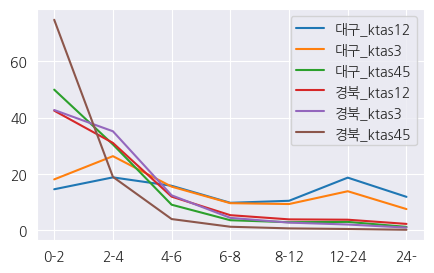

In [5]:
plt.figure(figsize=(5, 3))
for i in range(new_df.shape[0]):
    plt.plot(new_df.iloc[i, 2:], label="_".join(new_df.iloc[i, :2].values))
plt.legend()
plt.show()